📊 Desafio 52 — Análise de Empregabilidade de Recém-formados

📂 Dataset: Clique aqui para baixar o CSV

Este conjunto de dados fictício contém informações sobre estudantes recém-formados, com dados como curso, universidade, média final, estágio, localização e status de emprego após 6 meses da formatura.

🔍 Tarefas:

Qual a taxa geral de empregabilidade entre os graduados?

    (Dica: proporção de alunos com status "Empregado")

Há relação entre ter feito estágio e estar empregado?

    Gere uma tabela cruzada (crosstab) e visualize com um gráfico de barras.

Qual curso teve maior taxa de empregabilidade?

    Calcule a taxa de emprego por curso e ordene os resultados.

Crie um modelo preditivo simples

    Use LogisticRegression para prever a variável empregado com base em informações como media_final, fez_estagio, curso, universidade e cidade.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("dia_52_empregabilidade_graduados(1).csv")
df.head()

,curso,universidade,media_final,fez_estagio,cidade,empregado
0,Engenharia,UNB,9.40,0,Belo Horizonte,0
1,Engenharia,UFSP,7.39,0,Salvador,0
2,Direito,UNB,6.34,0,Belo Horizonte,1
3,Administração,UFSP,7.38,1,São Paulo,1
4,Administração,UFMG,6.91,1,Salvador,0


In [6]:
#Qual a taxa geral de empregabilidade entre os graduados?
taxaEmpregabilidade = df["empregado"].value_counts(normalize=True) * 100
print(taxaEmpregabilidade.to_string())

empregado
0    51.0
1    49.0


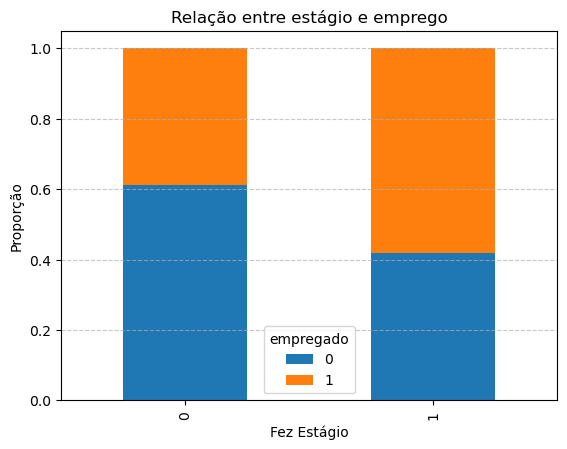

In [17]:
#Há relação entre ter feito estágio e estar empregado?
relEstagioEmpregado = pd.crosstab(df["fez_estagio"], df["empregado"], normalize="index")

relEstagioEmpregado.plot(kind="bar", stacked=True)
plt.title("Relação entre estágio e emprego")
plt.ylabel("Proporção")
plt.xlabel("Fez Estágio")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [47]:
#Qual curso teve maior taxa de empregabilidade?
taxaEmpregoPorCurso = df.groupby("curso")["empregado"].value_counts(normalize=True).unstack()[1].round(2) * 100
print(taxaEmpregoPorCurso.sort_values(ascending=False).to_string())

curso
Ciência da Computação    63.0
Direito                  53.0
Administração            46.0
Psicologia               45.0
Engenharia               40.0


In [46]:
#Crie um modelo preditivo simples
df_modelo = df.copy()

colunas = ["curso", "universidade", "cidade"]

le = LabelEncoder()
for col in colunas:
    df_modelo[col] = le.fit_transform(df_modelo[col])

X = df_modelo.drop(["empregado"], axis=1)
y = df_modelo["empregado"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")

Acurácia: 0.6333333333333333
